# Performance Study of Charcoal-based RRS for Ultra-clean Rare-event Detectors

Maris Arthurs, Dongqing Huang, Chamindu S. Amarasinghe, and Wolfgang Lorenzon -- University of Michigan

Eric Miller -- SLAC National Accelerator Laboratory

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# liabrary import
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

#!pip install matplotlib==3.2.1

import matplotlib
print (matplotlib.__version__)


3.2.1


In [3]:
# local function for figure display
# case_id = 1 for standard display
# case_id = 2 for pdf
# case_id = 3 for adjustable figure display
def figure_layout(case_id = 1, font = 'times new roman', weight = 'regular', size = 20):
   # case_id can only be 1,2,3
    if len([case_id]) > 1:
        print('Error: one case one time')
        return -1
    if (case_id == np.array([1,2,3])).sum() == 0:
        print('Error: Case can only be 1,2,or,3')
        return -1
    if case_id == 1:
        %matplotlib notebook
        %matplotlib inline
    elif case_id == 2:
        %matplotlib inline
        from IPython.display import set_matplotlib_formats
        set_matplotlib_formats('pdf')
    elif case_id == 3:
        %matplotlib notebook
    font = {'family' : font,
            'weight' : weight,
            'size'   : size}
    matplotlib.rc('font', **font)
    

### Radon Reduction with an RRS on the main circulation loop of LZ

Turnaround time of LZ in days: $T_{LZ} = \frac{M_{LZ}}{F \rho_{Xe}}$

In [5]:
#Constants
RoXeAtSTP     = 5.86     # desity of xenon at STP in g/l
totalXeMassLZ = 10000000 # g which is 10 metric tonnes
F             = 500      # SLPM nominal LZ mass flow rate

T_LZ          = totalXeMassLZ/(F*RoXeAtSTP*60*24) #Lz turnaround time in days


print("Turnover time of LZ is %.1f days" %T_LZ)



Turnover time of LZ is 2.4 days


radon reduction fraction in LZ with a perfect trap: $\frac{N_{ss}}{N_{max}} =\frac{T_{LZ}}{\epsilon_{RRS}\tau +T_{LZ}}$

In [6]:
TauRN         = 5.516 # radon lifetime in days

Rn_red_fraction_LZ = T_LZ/(TauRN + T_LZ) # fraction of radon reduction

# efficacy is 1 - radon reduction fraction
print("Radon reduction efficacy in LZ with a perfect trap is %.2f" %(1-Rn_red_fraction_LZ)) 

Radon reduction efficacy in LZ with a perfect trap is 0.70


Efficacy of Rn reduction in LZ: $ \epsilon_{LZ}=1-\frac{N_{ss}}{N_{max}}  =\frac{\tau }{\tau +T_{LZ}/\epsilon_{RRS}}$

In [7]:
# Efficacy of radon reduction in LZ
E_RRS = 0.4 # efficiency of the radon reduction system

# T_LZ (LZ volume exchange time) taken from cell 6

Ef_LZ = TauRN/(TauRN + T_LZ/E_RRS)
print("Radon reduction efficacy in LZ with a perfect trap is %.1f when RRS efficacy is %.1f" %(Ef_LZ, E_RRS))

Radon reduction efficacy in LZ with a perfect trap is 0.5 when RRS efficacy is 0.4


In [7]:
FlowSpace = np.linspace(1,3000,1000) # range of flow rates from 1 to 3000 SLPM
Tvspace   = np.linspace(0.1,7,1000) #range of volume exchange times in hours
RoXeAtSTP = 5.86     # desity of xenon at STP in g/l
TauRN     = 5.516 # radon lifetime in days

TvSpaceLZ = totalXeMassLZ/(FlowSpace*RoXeAtSTP*60*24) # LZ xenon turnaround time as a fuction of the flow rate (min)
red_efficiency = TauRN/(TauRN + TvSpaceLZ) # radon reduciton efficacy (1-RR) as a function of the circulation flow rate with a  perfect RRS
red_efficiency_Tv = TauRN/(TauRN + Tvspace)

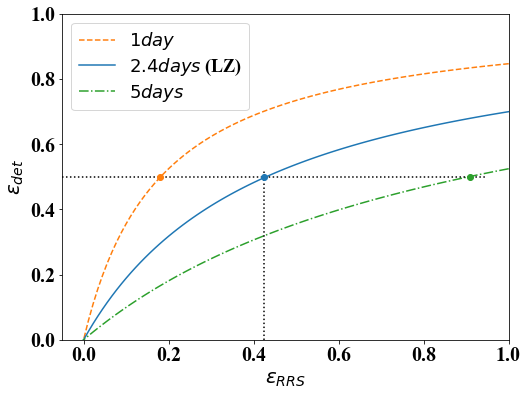

In [163]:
RoXeAtSTP     = 5.86 # desity of xenon at STP in g/l
totalXeMassLZ = 10000000 # g which is 10 metric tonnes
FlowRateLZ    = 500 # SLPM nominal LZ volumetric flow rate

TauRN     = 5.516 # radon lifetime in min

#turnaround time in LZ in days
Tlz_1 = totalXeMassLZ/(FlowRateLZ*RoXeAtSTP*60*24) #2.4days LZ volume exchange time (days)
Tv_2 = 1 # volume exchange time (days)
Tv_3 = 5 # volume exchange time (days)

fracRNescRRSspace = np.linspace(0, 1.1, 100)
effLZspace_1  = TauRN/(TauRN + Tlz_1/(1-fracRNescRRSspace))
effLZspace_2  = TauRN/(TauRN + Tv_2/(1-fracRNescRRSspace))
effLZspace_3  = TauRN/(TauRN + Tv_3/(1-fracRNescRRSspace))
figure_layout(1)
plt.figure(figsize=(8,6))

plt.plot(1-fracRNescRRSspace,effLZspace_2, '--', label="$1 day$", color='tab:orange')
plt.plot(1-fracRNescRRSspace,effLZspace_1      , label="$2.4 days$ (LZ)", color='tab:blue')
plt.plot(1-fracRNescRRSspace,effLZspace_3, '-.', label="$5 days$", color='tab:green')
plt.legend(loc='auto', frameon=True, labelspacing=0.2, prop={'size': 18})

plt.axhline(y=0.5, color='k', xmax=0.95, linestyle=':')
plt.axvline(x=0.424, color='k', ymax=0.52, linestyle=':')
plt.plot(0.424, 0.5, color='tab:blue', marker='o')
plt.plot(0.91, 0.5, color='tab:green', marker='o')
plt.plot(0.18, 0.5, color='tab:orange', marker='o')

plt.ylim(0,1)
plt.xlim(-0.05,1)

plt.ylabel('$\epsilon_{det}$')
plt.xlabel('$\epsilon_{RRS}$')
plt.show()

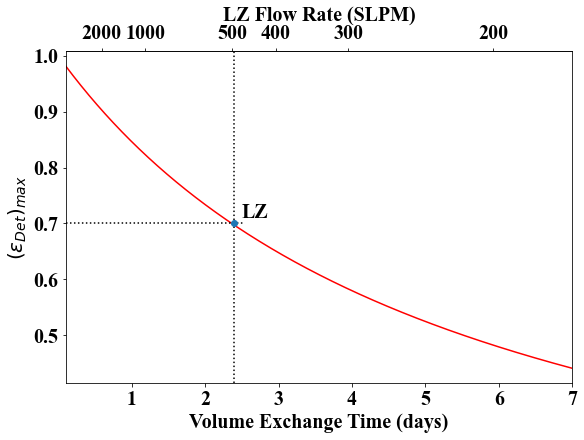

In [165]:
figure_layout(1)
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)

ax.plot(Tvspace,red_efficiency_Tv, 'r')


#ax.set_xlim(0, 3)
#ax.set_ylim(0.6, 1)
ax.set_ylabel('$(\epsilon_{Det})_{max}$')
ax.set_xlabel('Volume Exchange Time (days)')

plt.axhline(y=0.7, xmin=0, xmax=0.35, color='k', linestyle=':')
plt.axvline(x=2.4, ymin=0, ymax=1, color='k', linestyle=':')
#plt.plot(2.4, 0.7, 'ko')
plt.plot(2.4, 0.7, color='tab:blue', marker='o')
#plt.plot(5, 0.525, color='tab:green', marker='o')
#plt.plot(1, 0.848, color='tab:orange', marker='o')
plt.text(2.5, 0.71, 'LZ', dict(size=15), color='k', size=20)



def flow2Tv(Tvspace):
    return (totalXeMassLZ/(Tvspace*RoXeAtSTP*60*24))

def Tv2flow(Tvspace):
    return (totalXeMassLZ/(Tvspace*RoXeAtSTP*60*24))

secax = ax.secondary_xaxis('top', functions=(flow2Tv, Tv2flow))
secax.set_xlabel('LZ Flow Rate (SLPM)')
secax.set_xticks(np.array([2000,1000,500,400,300,200]))
plt.autoscale(enable=True, axis='x', tight=True)
plt.show()

### Exploring performance of an ideal (no intrinsic activity) single-trap

reduction fraction a perfect trap with no activity: $r =\frac{ A_{out}}{A_{in}} = e^{-\frac{m}{\mu}}$ <br>
characteristic mass of a trap: $\mu=f\tau /k_a$

In [166]:
flowSpace = np.linspace(0,2000,300, endpoint=False) # range of flow rates SLPM
red_frac  = 0.1 # (1-efficacy i.e. efficacy is 0.9)

Ka_ct     = 3000        # l/kg at 190K
Ka_wt     = 500         # l/kg at 295K
TauRN     = 5.516*24*60 # min radon lifetime
S_o       = 0.5         # mBq/kg

mass_cold = flowSpace*(-np.log(red_frac))*TauRN/Ka_ct # mass of charcoal needed to achieve Teff efficacy in cold
mass_warm = flowSpace*(-np.log(red_frac))*TauRN/Ka_wt # mass of charcoal needed to achieve Teff efficacy in warm


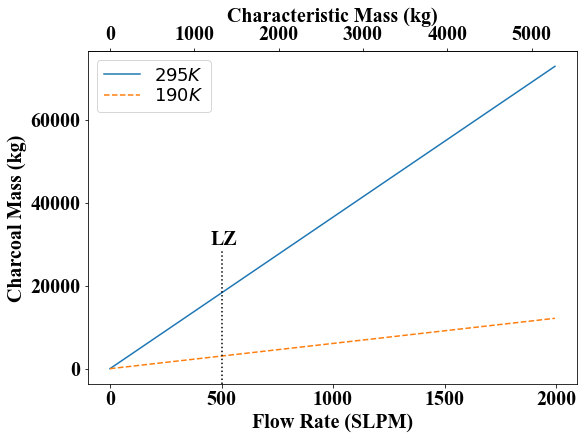

In [169]:
figure_layout(1)
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
ax.plot(flowSpace, mass_warm, label="$295 K$")
ax.plot(flowSpace, mass_cold, '--', label="$190 K$")
ax.set_xlabel('Flow Rate (SLPM)')
ax.set_ylabel('Charcoal Mass (kg)')
ax.legend(loc='auto', frameon=True, labelspacing=0.2, prop={'size': 18})

def flow2miu(flowSpace):
    return (flowSpace*TauRN/Ka_ct)

def miu2flow(flowSpace):
    return (flowSpace)

plt.axvline(x=500, ymin=0, ymax=0.4, color='k', linestyle=':')
plt.text(450, 30000, 'LZ', dict(size=15), color='k', size=20)

secax = ax.secondary_xaxis('top', functions=(flow2miu, miu2flow))
secax.set_xlabel('Characteristic Mass (kg)')
plt.show()

### Exploring performance of an realisitic single-trap

Efficacy of a single trap: $\epsilon=1-A_{out}/A_{in} = 1- e^{-\frac{m}{\mu}} - \frac{s_o \mu}{A_{in}} \left(1-e^{-\frac{m}{\mu}}\right)$ <br>
define a new parameter as $f_{critical} = \frac{A_{in}k_a}{s_o \tau}$
Efficacy of a single trap: $\epsilon=1-A_{out}/A_{in} = 1- e^{-\frac{m}{\mu}} - \frac{f}{f_{critical}} \left(1-e^{-\frac{m}{\mu}}\right)$ <br>
characteristic mass of a trap: $\mu=f\tau /k_a$

In [170]:
#this funtion calculates the efficacy of a single-column adsorptive trap
# CFR is the flow rate in units of critical flow (i.e. f/fcritical)
# is the charcoal mass in units of characteristic mass (i.e. m/miu)
def E_CT_new(CFR, CMR):
    return 1- np.exp(-CMR) - CFR*(1 - np.exp(-CMR))

In [171]:
# defining a range of flows in units of critical flow
CFR = np.linspace(0,4,1000)

ectSpace02_new = E_CT_new(CFR, 0.2) # mass 0.2miu
ectSpace1_new  = E_CT_new(CFR, 1)   # mass miu
ectSpace2_new  = E_CT_new(CFR, 2)   # mass 2miu
ectSpace10_new = E_CT_new(CFR, 10)  # mass 10miu

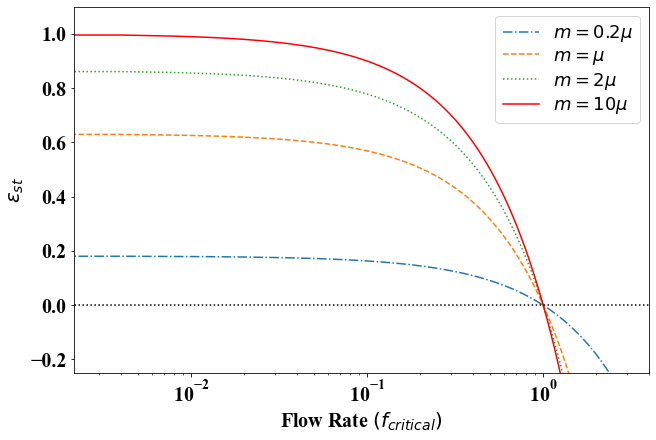

In [173]:
figure_layout(1)
fig, ax = plt.subplots(figsize=(9,6), constrained_layout=True)

ax.semilogx(CFR, ectSpace02_new, '-.', label="$m  = 0.2\mu$")
ax.semilogx(CFR, ectSpace1_new, '--', label="$m  = \mu$")
ax.semilogx(CFR, ectSpace2_new, ':',  label="$m = 2\mu$")
ax.semilogx(CFR, ectSpace10_new, 'r', label="$m  = 10\mu$")

ax.plot(0*np.ones(len(CFR)), ':', c='k')
ax.set_xlim(0, 4)
#ax.plot(CFR,0*np.ones(len(CFR)), ':', c='k')
#plt.axvline(x=0.033, ymin=-0.95, ymax=0.95, color='k', linestyle=':')
#plt.text(0.039, 0.85, 'LZ', dict(size=15), color='k',)
#plt.text(0.039, 0.75, '$m/ \mu = 7.6$', dict(size=15), color='k',)
#plt.text(0.039, 0.65, '$f/f_{critical} = 0.033$', dict(size=15), color='k',)


#ax.set_xlim(0.1, 1000)
ax.set_ylim(-0.25, 1.1)
ax.set_xlabel("Flow Rate $(f_{critical})$")
ax.set_ylabel('$\epsilon_{st}$')
ax.legend(loc='auto', frameon=True, labelspacing=0.2, prop={'size': 18})

plt.show()

In [174]:
# defining a range of masses in units of characteristic mass
CMR = np.linspace(0,10,1000)

ectSpace001_new = E_CT_new(0.01, CMR) # flow rate 0.01fcritical
ectSpace01_new = E_CT_new(0.1, CMR)   # flow rate 0.1fcritical
ectSpace05_new = E_CT_new(0.5, CMR)   # flow rate 0.5fcritical
ectSpace1_new = E_CT_new(1, CMR)      # flow rate fcritical
ectSpace5_new = E_CT_new(2, CMR)      # flow rate 2fcritical

In [176]:
figure_layout(1)
fig, ax = plt.subplots(figsize=(9,6), constrained_layout=True)

ax.semilogx(CMR, ectSpace001_new, 'r', label="$f = 0.01f_{critical}$")
ax.semilogx(CMR, ectSpace01_new, '-.', label="$f = 0.1f_{critical}$")
ax.semilogx(CMR, ectSpace05_new, '--',  label="$f = 0.5f_{critical}$")
ax.semilogx(CMR, ectSpace1_new, ':',  label="$f = f_{critical}$")
ax.semilogx(CMR, ectSpace5_new, linestyle='--', dashes=(5,2,20,2),  label="$f = 2f_{critical}$")

ax.set_xlabel("Mass $(\mu)$")
ax.set_ylabel('$\epsilon_{st}$')
ax.legend(loc='auto', frameon=True, labelspacing=0.2, prop={'size': 18})

plt.show()

In [177]:
# defining constants for an LZ specific example
flow_LZ_irrs   = 0.5  #SLPM
Ka_ct_LZ  = 3000 #l/kg
TauRN     = 5.516*24*60 # radon lifetime in min
mass_LZ   = 10 #kg
S_o       = 0.5 #mBq/kg
A_in      = 20 # mBq


#characteristic mass of a trap given by eq above cell 43
def miu(flow, ka, Tau):
    return (flow*Tau/ka)

LZiRRS_miu = miu(flow_LZ_irrs, Ka_ct_LZ, TauRN)
print("The characteristic mass of the LZ iRRS (single-trap) %.1f kg" %LZiRRS_miu)

m_miu_LZ = mass_LZ/LZiRRS_miu
print("The LZ iRRS (single-trap) mass %.1f kg in units of the characteristic mass: %.1f" %(mass_LZ ,m_miu_LZ))

# critical flow rate of a tram given by eq above cell 43
def f_critical(ka, Tau, Srn, A_in):
    return A_in*ka/(Srn*Tau)

LZiRRS_fc =  f_critical(Ka_ct_LZ, TauRN, S_o, A_in)
print("The critical flow rate of the LZ iRRS (single-trap) %.3f SLPM" %LZiRRS_fc)

f_fc_LZ = flow_LZ_irrs/LZiRRS_fc
print("The LZ iRRS (single-trap) flow rate %.3f SLPM in units of critical flow %.3f " %(flow_LZ_irrs, f_fc_LZ))



The characteristic mass of the LZ iRRS (single-trap) 1.3 kg
The LZ iRRS (single-trap) mass 10.0 kg in units of the characteristic mass: 7.6
The critical flow rate of the LZ iRRS (single-trap) 15.108 SLPM
The LZ iRRS (single-trap) flow rate 0.500 SLPM in units of critical flow 0.033 


In [178]:
#this funtion calculates the efficacy of a single-column adsorptive trap given above cell 43
def E_CT(flow, mass, ka, Tau, Srn, N):
    return 1- np.exp(-ka*mass/(flow*Tau)) - Srn*flow*(Tau/ka)*(1 - np.exp(-ka*mass/(flow*Tau)))/N

In [179]:
#LZ iRRS specific constants
Ka_ct     = 3000         # l/kg at 190K
Ka_wt     = 500          # l/kg at 295K
TauRN     =  5.516*24*60 # radon lifetime in min
S_o       = 0.5          # mBq/kg
Trap_mass = 10           # mass of the charcoal kg
A_in      = 20           # mBq total inlet radon activity

flowSpace = np.linspace(0.2,1000,10000)

#Efficacy of a single-trap at 190K as a fuction of flow rates for a range of charcoal masses (charcoal actibity 0.5mBq/kg)
ectSpaceM5   = E_CT(flowSpace,5,  Ka_ct,TauRN,0.5,A_in)
ectSpaceM10  = E_CT(flowSpace,10, Ka_ct,TauRN,0.5,A_in)
ectSpaceM25  = E_CT(flowSpace,25, Ka_ct,TauRN,0.5,A_in)
ectSpaceM50 = E_CT(flowSpace,50,Ka_ct,TauRN,0.5,A_in)

In [181]:
figure_layout(1)
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)

ax.semilogx(flowSpace, ectSpaceM5,  ':',  label="$m = 5 kg$")
ax.semilogx(flowSpace, ectSpaceM10, 'r',  label="$m = 10 kg$")
ax.semilogx(flowSpace, ectSpaceM25, '-.', label="$m = 25 kg$")
ax.semilogx(flowSpace, ectSpaceM50,'--', label="$m = 50 kg$")

ax.plot(0*np.ones(len(flowSpace)), ':', c='k')

ax.set_xlim(0.5, 100)
#ax.set_ylim(60, 100)

ax.set_xlabel('Flow Rate (SLPM)')
ax.set_ylabel('$\epsilon_{st}$')
ax.legend(loc='auto', frameon=True, labelspacing=0.2, prop={'size': 18})

def flow2miu(flowSpace):
    return (flowSpace*TauRN/Ka_ct)

def miu2flow(flowSpace):
    return (flowSpace)

secax = ax.secondary_xaxis('top', functions=(flow2miu, miu2flow))
secax.set_xlabel('Characteristic Mass (kg)')
plt.show()

### Performance of a VSA system for TPC detectors ignoring charcoal activity

simulation that calculates the radon dynamics of a VSA in the absense of charcoal activity according to:
$(N_{out})_{n} = (N_{in})_{n}(1-\eta_{vsa})f_{out}$ <br>
and  $(N_{in})_{n+1} = N_{Det} + (1-\epsilon_{st})\left[(N_{in})_n(1-\eta_{vsa})f_{purge} + (N_{in})_{n}\eta_{vsa}e^{-\frac{T_{feed}}{\tau }}\right]$ <br>
where $(N_{in})_{n}\eta_{vsa}e^{-\frac{T_{feed}}{\tau }}$ gives the number of radon atoms that did not decay in the feed column. Note that given that the breakthrough time in the purge column is expected to be about an order of magnitude shorter than the breakthrough time in the feed column, radon reduction in purge column is negligible. The simulation assumes that radon atoms which were trapped in the feed stage but did not decay in the column will end up in the feedback loop. <br> <br>
Lets convert all absolute radon quantities into fractional variables. <br>
Define radon fraction $\gamma$ as $\gamma = N/N_{Det}$ where $N_{Det}$ is the inlet number of radon atoms from the detector. With this new definition the set of equations given above will transform to: <br>
$(\gamma_{out})_{n} = (\gamma_{in})_{n}(1-\eta_{vsa})f_{out}$ <br>
$(\gamma_{in})_{n+1} = 1 + (1-\epsilon_{st})\left[(\gamma_{in})_n(1-\eta_{vsa})f_{purge} +(\gamma_{in})_{n}\eta_{vsa}e^{-\frac{T_{feed}}{\tau }}\right]$ <br>



In [182]:
# Performace of the VSA as a function of the swing time this does not take into account specific activity of charcoal
# Parameters

############### Defining computational parameters ################
nLoops = 1000 # number of swings

Evsa_99 = 0.99 # VSA feed column remanent fraction, percentage of inlet radon trapped by feed column
Evsa_95 = 0.95 # VSA feed column remanent fraction, percentage of inlet radon trapped by feed column
Evsa_90 = 0.90 # VSA feed column remanent fraction, percentage of inlet radon trapped by feed column

# this script is only with a VSA and without a single trap 
# so Ect (efficiency of the single-trap) is taken zero
Ect = 0 # radon removal efficacy of the feedback-loop single-trap, (1-Ect) percentage of radon escaping the cold trap

r_leave = 0.9 # fraction of xenon leaving the swing system
r_purge = 0.1 # fraction of xenon for purging the other column of the swing system (F_leave + F_purge = 1)

Trn = 132*60 # Rn lifetime in unit of minute (note this is lifetime not half life)
TfSpace = np.linspace(30,600,1000) # range of feed times
##################################################################


# pre-allocation sim needed variables
Gout_99 = np.zeros(nLoops) # array of radon fraction escaped in each feed
Gout_95 = np.zeros(nLoops) # array of radon fraction escaped in each feed
Gout_90 = np.zeros(nLoops) # array of radon fraction escaped in each feed

Gloop_99 = np.zeros(nLoops) # array of radon fraction in the loop during each feed
Gloop_95 = np.zeros(nLoops) # array of radon fraction in the loop during each feed
Gloop_90 = np.zeros(nLoops) # array of radon fraction in the loop during each feed

# pre-allocating a variable to store the steady state Rn fraction for each feed time
Gout_st_99 = np.zeros(len(TfSpace))
Gout_st_95 = np.zeros(len(TfSpace))
Gout_st_90 = np.zeros(len(TfSpace))

# simulation starts:
# looping over the feed times
for idx, t in enumerate(TfSpace):
    
    Gi_99 = 1 #  initial rn fraction (1 b/c no reductin at first)
    Gi_95 = 1 #  initial rn fraction 
    Gi_90 = 1 #  initial rn fraction 
    #looping over the feeds
    for i in range(0,nLoops):
        # number of radon escaped the swing system
        Gout_99[i] = r_leave*(1-Evsa_99)*Gi_99
        Gout_95[i] = r_leave*(1-Evsa_95)*Gi_95
        Gout_90[i] = r_leave*(1-Evsa_90)*Gi_90

        # Nin changes as we loop over the feed cycle time until we reach steady state
        Gi_99 = (1-Ect)*(r_purge*(1-Evsa_99)*Gi_99
                         + (Evsa_99*Gi_99)*np.exp(-t/Trn))  +   1
        Gi_95 = (1-Ect)*(r_purge*(1-Evsa_95)*Gi_95
                         + (Evsa_95*Gi_95)*np.exp(-t/Trn))  +   1
        Gi_90 = (1-Ect)*(r_purge*(1-Evsa_90)*Gi_90
                         + (Evsa_90*Gi_90)*np.exp(-t/Trn))  +   1
        
    Gout_st_99[idx] = Gout_99[-1]
    Gout_st_95[idx] = Gout_95[-1]
    Gout_st_90[idx] = Gout_90[-1]





In [184]:
figure_layout(1)

fig, ax = plt.subplots(figsize=(9,6))
ax.semilogx(TfSpace, Gout_st_99,       label='$\eta_{feed} = 0.99$')
ax.semilogx(TfSpace, Gout_st_95, ':',  label='$\eta_{feed} = 0.95$' )
ax.semilogx(TfSpace, Gout_st_90, '-.', label='$\eta_{feed} = 0.90$' )
ax.set_xscale('log')
ax.set_xticks([30, 60, 100, 600])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xlabel('Feed Cycle Time [min]')
ax.set_ylabel('$(\gamma_{out})_{ss}$')
plt.ylim([0.1,1.1])

ax.axhline(y=0.55, xmax = 0.28, color='k', linestyle=':')
ax.axvline(x=60, ymax = 0.5, color='k', linestyle=':')
ax.plot(60, 0.55, 'o', color='k')
ax.text(65, 0.57, '55%', dict(size=15), color='k',size=20)
ax.legend(loc='upper right', frameon=True, labelspacing=0.2, prop={'size': 18})

In [185]:
############### Defining computational parameters ################
nLoops = 400 # number of swings

Evsa_99 = 0.99 # radon removal remanent fraction of the swing system 
Evsa_95 = 0.95 # radon removal remanent fraction of the swing system 
Evsa_90 = 0.90 # radon removal remanent fraction of the swing system 



# this script is only with a VSA and without a single trap 
# so Ect (efficacy of the single-trap) is taken zero here
Ect = 0 # radon removal efficacy of the cold trap, percentage of radon trapped by cold trap

r_leave = 0.9 # fraction of cleaned air (xenon) leaving the swing system
r_purge = 0.1 # fraction of cleaned air (xenon) for purging the other colume of the swing system (F_leave + F_purge = 1)
Trn = 132*60 # Rn lifetime in unit of minute (note this is lifetime not half life)
 

T_feed = 60 # one swing time in unit of minute in min
###################################################################

Gi_99 = 1 #  initial Rn fraction (1 b/c no reductin at first)
Gi_95 = 1 #  initial Rn fraction
Gi_90 = 1 #  initial Rn fraction

# pre-allocation sim needed variables
Gout_99 = np.zeros(nLoops) # array of radon fraction escaped in each feed
Gout_95 = np.zeros(nLoops) # array of radon fraction escaped in each feed
Gout_90 = np.zeros(nLoops) # array of radon fraction escaped in each feed

Gloop_99 = np.zeros(nLoops+1) # array of radon fraction in the loop each feed it is (+1) b/c initialization of loop below
Gloop_95 = np.zeros(nLoops+1) # array of radon fraction in the loop each feed it is (+1) b/c initialization of loop below
Gloop_90 = np.zeros(nLoops+1) # array of radon fraction in the loop each feed it is (+1) b/c initialization of loop below


#defining the first loop element when purge column is not saturated. It has no contribution from the input of detector
Gloop_99[0] = r_purge*((1-Evsa_99)*Gi_99)  
Gloop_95[0] = r_purge*((1-Evsa_95)*Gi_95) 
Gloop_90[0] = r_purge*((1-Evsa_90)*Gi_90) 

# simulation starts:
#looping over the feeds
for i in range(0,nLoops):
    # estimate number of radon escaped the swing system
    Gout_99[i] = r_leave*((1-Evsa_99)*(Gi_99))
    Gout_95[i] = r_leave*((1-Evsa_95)*(Gi_95))
    Gout_90[i] = r_leave*((1-Evsa_90)*(Gi_90))
    
    #number of radon atoms in the loop as we loop over the feed cycle times
    Gloop_99[i+1] = r_purge*((1-Evsa_99)*Gi_99) + (Evsa_99*Gi_99)*np.exp(-T_feed/Trn) 
    Gloop_95[i+1] = r_purge*((1-Evsa_95)*Gi_95) + (Evsa_95*Gi_95)*np.exp(-T_feed/Trn) 
    Gloop_90[i+1] = r_purge*((1-Evsa_90)*Gi_90) + (Evsa_90*Gi_90)*np.exp(-T_feed/Trn) 

   
    # Nin changes as we loop over the feed cycle time until we reach steady state
    Gi_99  = 1 + (1-Ect)*(r_purge*(1-Evsa_99)*Gi_99 + (Evsa_99*Gi_99)*np.exp(-T_feed/Trn))
    Gi_95  = 1 + (1-Ect)*(r_purge*(1-Evsa_95)*Gi_95 + (Evsa_95*Gi_95)*np.exp(-T_feed/Trn))
    Gi_90  = 1 + (1-Ect)*(r_purge*(1-Evsa_90)*Gi_90 + (Evsa_90*Gi_90)*np.exp(-T_feed/Trn))

    

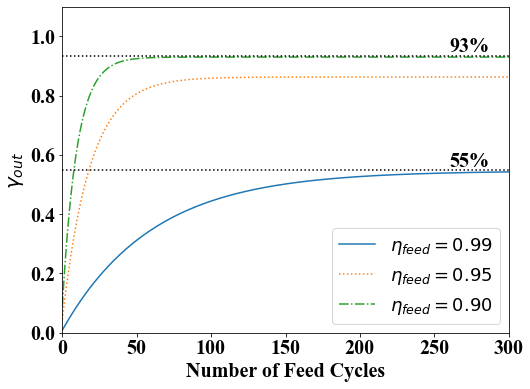

In [187]:
# do plot - radon escaping the swing system asymptotically reaching a constant value.
# this value indicates the performance of the swing system
figure_layout(1)
plt.figure(figsize=(8,6))

plt.plot(Gout_99,       label='$\eta_{feed} = 0.99$')
plt.plot(Gout_95, ':',  label='$\eta_{feed} = 0.95$')
plt.plot(Gout_90, '-.', label='$\eta_{feed} = 0.90$')

plt.axhline(y=0.55, color='k', linestyle=':')
plt.text(260, 0.56, '55%', dict(size=15), color='k', size=20)

plt.axhline(y=0.935, color='k', linestyle=':')
plt.text(260, 0.95, '93%', dict(size=15), color='k',size=20)

plt.xlabel('Number of Feed Cycles')
plt.ylabel('$\gamma_{out}$')
plt.xlim(0,300)
plt.ylim(0, 1.1)
plt.legend(frameon=True, prop={'size': 18})
plt.show()

In [8]:
############### Defining computational parameters ################

nLoops = 1000 # number of swings

Evsa = np.linspace(0,1,2001) # array of radon removal efficiency of the swing system in one swing, percentage of radon trapped by VSA
Ect = np.linspace(0,1,2001) # array of radon removal efficiency of the cold trap, percentage of radon trapped by cold trap

r_leave = 0.9 
r_purge = 0.1 

Trn = 132*60 # # Rn lifetime in unit of minute (note this is lifetime not half life)
T_feed = 60 # # one swing time in unit of minute
#################################################################

Gi = 1 # initial Rn fraction (1 b/c no reductin at first)


# pre-allocation sim needed variables
Gout_matrix = np.zeros([len(Evsa) ,nLoops]) # matrix of radon fraction escaped in each swing
Gtot = np.zeros([len(Evsa),len(Ect)]) # matrix of total radon fraction escaped
Evsa_matrix = np.zeros([len(Evsa),len(Ect)]) # Evsa matrix
E_matrix = np.zeros([len(Evsa),len(Ect)]) # Ect matrix

# simulation starts:
for idx2, e2 in enumerate(Ect):
    for i in range(0,nLoops):
        # radon fraction escaped the swing system
        Gout_matrix[:,i] = r_leave*(1-Evsa)*Gi

        # Gi changes as we loop over the feed cycle time until we reach steady state      
        Gi = ( (1-e2)*(r_purge*(1-Evsa)*Gi 
                     + (Evsa*Gi)*np.exp(-T_feed/Trn))  
               + 1 )
    # save the escaped radon fraction at asymptotic value to Ntot
    Gtot[:,idx2] = Gout_matrix[:,-1]
    Evsa_matrix[:,idx2] = Evsa
    
for idx1, e1 in enumerate(Evsa):
    E_matrix[idx1] = Ect*e1




In [9]:
# do plot
figure_layout(1)
plt.figure(figsize=(8,6))

manual_locations = [(0.7, 0.95), (0.35, 0.9), (0.35, 0.85), (0.4, 0.77), (0.22, 0.81), (0.2, 0.75)]
cp = plt.contour(Evsa, Ect, 1-Gtot, levels=[0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], cmap='RdPu')
plt.clabel(cp, inline=True, fontsize=14, manual=manual_locations, inline_spacing=0,fmt='%.01f')

plt.imshow(1-Gtot, origin='lower', alpha=1, extent = [0, 1, 0.7, 1], aspect = 6)
cbar = plt.colorbar();

plt.axhline(y=0.9, color='white', linestyle=':')
plt.axvline(x=0.1, color='white', linestyle=':')
plt.plot(0.1, 0.9, 'o', color='white')
plt.text(0.06, 0.88, '52%', dict(size=15), color='white', size=20)

plt.text(0.025, 0.74, '0.1', dict(size=15), color='white', backgroundcolor='#400c68')
plt.text(0.055, 0.74, '0.2', dict(size=15), color='white',backgroundcolor='#400c68')

cbar.set_label('$\epsilon_{RRS}$', rotation=90)
plt.xlabel('$\epsilon_{st}$')
plt.ylabel('$\eta_{feed}$')
plt.xscale('log')
plt.ylim([0.7,1])
plt.xlim([0.01,1])
plt.show()

In [10]:
############### Defining computational parameters ################
RoXeAtSTP     = 5.86 # desity of xenon at STP in g/l
totalXeMassLZ = 10000000 # g which is 10 metric tonnes
FlowRateLZ    = 500 # SLPM nominal LZ volumetric flow rate
Trn = 132*60 # # Rn lifetime in unit of minute (note this is lifetime not half life)
##################################################################

#turnaround time in LZ in min
Tlz = totalXeMassLZ/(FlowRateLZ*RoXeAtSTP)

def radonReductionInDet(TurnaroundTime, radonLifeTime, eff): 
    if eff == 'perfect':
        return radonLifeTime/(TurnaroundTime+radonLifeTime)
    else:
        return radonLifeTime/(TurnaroundTime/eff+radonLifeTime)

#Rn reduction  of 10,000 kg xenon in LZ with a perfect RRS at 500 SLPM
lz_Rn_red_perfect = radonReductionInDet(Tlz, Trn, 'perfect')

#Rn reduction in 10,000 kg senonLZ with a realistic RRS with efficiency given by (1-Gtot) 
lz_Rn_red = radonReductionInDet(Tlz, Trn, (1-Gtot))

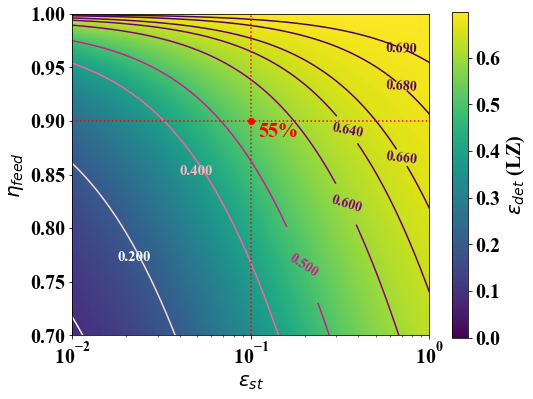

In [11]:
# do plot
figure_layout(1)
plt.figure(figsize=(8,6))

manual_locations = [(0.7, 0.97), (0.7, 0.95),(0.7, 0.85), (0.35, 0.9), (0.35, 0.85), (0.2, 0.77)]
cp = plt.contour(Evsa, Ect, lz_Rn_red, levels=[0.1, 0.2, 0.4, 0.5, 0.6, 0.64, 0.66, 0.68, 0.69], cmap='RdPu')
plt.clabel(cp, inline=True, fontsize=14, manual=manual_locations, inline_spacing=0)
plt.text(0.04, 0.85, '0.400', dict(size=15), color='lightpink')
plt.text(0.018, 0.77, '0.200', dict(size=15), color='white')

plt.imshow(lz_Rn_red, extent=[0, 1, 0, 1], origin='lower', alpha=1, aspect = 6)
cbar = plt.colorbar();

plt.axhline(y=0.9, color='r', linestyle=':')
plt.axvline(x=0.1, color='r', linestyle=':')
plt.plot(0.1, 0.9, 'ro')
plt.text(0.11, 0.885, '55%', dict(size=15), color='r', size=20)

plt.xlabel('$\epsilon_{st}$')
plt.ylabel('$\eta_{feed}$')

cbar.set_label('$\epsilon_{det}$ (LZ)', rotation=90)

plt.xscale('log')
plt.ylim([0.7,1])
plt.xlim([0.01,1])
plt.show()

### Performance of a  VSA with remanent fraction of 0.9 that has  a  single-trap in the feedback loop with efficacy of 0.1 as a function of charcoal activity



The trap contribution in a single feed cycle is obtained from: <br>
$(N_{trap})_{feed} \approx \frac{s_om}{2(t_b)_{feed}}T_{feed}^2$ <br>
<br>
$(N_{trap})_{purge} \approx \frac{s_om}{2(t_b)_{purge}}T_{feed}^2$ <br>
<br>
Note, in $(N_{trap})_{feed}$ and $(N_{trap})_{purge}$ the only difference is that they have different breakthrough times. By design, the purge column has about an order of magnitude shorter breakthrough time compared to the feed column $(t_b)_{feed} = 10(t_b)_{feed}$ <br>
<br>
lets convert all absolute radon quantities into fractional variables
Defined radon fraction $\gamma$ as $\gamma = N/N_{feed}$ <br> 
where $N_{feed}=\rho_{Xe}\,c_{Xe}\,f\,T_{feed} \tau$ is the inlet number of radon atoms from the detector in one feed time. With this new definition the set of equations given above will transform to: <br>
$(\gamma_{out})_{n} = (\gamma_{in})_{n}(1-\eta_{vsa})f_{out} + \gamma_{feed}r_{out}$ <br>
$(\gamma_{in})_{n+1} = 1 + (1-\epsilon_{st})\left[(\gamma_{in})_n(1-\eta_{vsa})f_{purge} + (\gamma_{in})_{n}\eta_{vsa}e^{-\frac{T_{feed}}{\tau }} +\gamma_{feed}r_{purge} + \gamma_{purge}\right]$ <br> <br>
<br>
$(\gamma_{trap})_{feed} = \frac{1}{N_{feed}} \frac{s_om}{2(t_b)_{feed}}T_{feed}^2 = (\frac{1}{2})(\frac{1}{\rho_{Xe}k_a})(\frac{S_{o}}{c_{Xe}})(\frac{T_{feed}}{\tau})(\frac{f_{feed}}{F}) $ <br>
<br>
$(\gamma_{trap})_{purge} = \frac{1}{N_{feed}} \frac{s_om}{2(t_b)_{purge}}T_{feed}^2 = (\frac{1}{2})(\frac{1}{\rho_{Xe}k_a})(\frac{S_{o}}{c_{Xe}})(\frac{T_{feed}}{\tau})(\frac{f_{purge}}{F}) $

In [4]:
T_feed    = 60 #min
rho_xe    = 5.86 # stp density of xenon g/l 
C_Xe      = 2 #activity of radon in Xe microBq/kg


def inletRnActivity(densityXe, detFlow, activityXe, timeFeed):
    return (densityXe)*activityXe*detFlow*timeFeed # activity in mBq/feed
DetinRnActivity = inletRnActivity(rho_xe, 500,  C_Xe/1000, T_feed)/1000 # convert kg to g and micro to mili
print("LZ inlet radon activity in one feed %.3f mBq/feed" %DetinRnActivity)



LZ inlet radon activity in one feed 0.352 mBq/feed


In [5]:
############### Defining computational parameters and constants ###################
Trn       = 132*60 # Rn lifetime in unit of minute (note this is lifetime not half life)
T_feed    = 60     #min
rho_xe    = 5.86   # stp density of xenon g/l
c_Xe      = 2      #activity of radon in Xe microBq/kg
S_o       = 500    # radon activity of charcoal in microBq/kg

Ka_ct     = 3      #l/g at 190K
Ka_wt     = 0.5    #l/g at 295K

r_leave = 0.9 # fraction of cleaned carrier gas leaving the swing system
r_purge = 0.1 # fraction of cleaned carrier gas for purging 

feedFlowFraction  = 1/r_leave       # fraction of flow in the feed column of the vsa to detector flow rate
purgeFlowFraction = r_purge/r_leave # fraction of flow in the purge column of the vsa to detector flow rate


oxe = S_o/c_Xe
#####################################################################################


def TrapRnPerFeedFrac(densityXe, SoPerXe, feedTime, radonLife, adsK, flowFrac):
    return (1/2)*(1/(densityXe*adsK))*(SoPerXe)*(feedTime/radonLife)*(flowFrac) 

TRF_feed  = TrapRnPerFeedFrac(rho_xe, oxe, T_feed, Trn, Ka_ct, feedFlowFraction)
print("Feed column Rn fraction per feed for is %.4f " %(TRF_feed)) 
TRF_purge = TrapRnPerFeedFrac(rho_xe, oxe, T_feed, Trn, Ka_ct, purgeFlowFraction*100) 
print("Purge column Rn fraction per feed is %.4f " %(TRF_purge))



Feed column Rn fraction per feed for is 0.0599 
Purge column Rn fraction per feed is 0.5985 


In [23]:
# Performance of the VSA including the specific activity of charcoal

############### Defining computational parameters and constants ######################
nLoops = 1000 # number of swings

Trn       = 132*60 # Rn lifetime in unit of minute (note this is lifetime not half life)
T_feed    = 60     # min
rho_xe    = 5.86   # stp density of xenon g/l


Ka_ct     = 3   # l/g at 190K
Ka_wt     = 0.5 # l/g at 295K
 
r_leave = 0.9 # fraction of cleaned carrier gas leaving the swing system
r_purge = 0.1 # fraction of cleaned carrier gas for purging 

feedFlowFraction  = 1/r_leave       # fraction of flow in the feed column of the vsa to detector flow rate
purgeFlowFraction = r_purge/r_leave # fraction of flow in the purge column of the vsa to detector flow rate

Evsa = 0.9 # VSA (feed column) remanent fraction, percentage of inlet radon trapped by VSA
Ect = 0.1  # radon removal efficiency of the single trap, percentage of radon trapped by single trap

SoCxeSpace = np.linspace(0, 700, 701)
###########################################################################################

Gout_st_1  = np.zeros(len(SoCxeSpace))
Gloop_st_1 = np.zeros(len(SoCxeSpace))
Gout_st_2  = np.zeros(len(SoCxeSpace))
Gloop_st_2 = np.zeros(len(SoCxeSpace))

# simulation starts:
for idx, s in enumerate(SoCxeSpace):
    Gi_1 = 1 # initial Rn fraction (1 b/c no reductin at first)
    Gi_2 = 1 # initial Rn fraction (1 b/c no reductin at first)

    # pre-allocation sim needed variables
    Gout_1  = np.zeros(nLoops) # array of radon fraction escaped in each swing
    Gloop_1 = np.zeros(nLoops) # array of radon fraction in the loop during each swing
    Gout_2  = np.zeros(nLoops) # array of radon fraction escaped in each swing
    Gloop_2 = np.zeros(nLoops) # array of radon fraction in the loop during each swing
    
    for i in range(0,nLoops):
        
        #fraction of radon atoms from the feed column in one feed time 
        TRF_feed_warm  = TrapRnPerFeedFrac(rho_xe, s, T_feed, Trn, Ka_wt, feedFlowFraction) 
        TRF_feed_cold  = TrapRnPerFeedFrac(rho_xe, s, T_feed, Trn, Ka_ct, feedFlowFraction)

        
        #fraction of radon atoms from the purge column in one feed time 
        TRF_purge_warm = TrapRnPerFeedFrac(rho_xe, s, T_feed, Trn, Ka_wt, feedFlowFraction)*10
        TRF_purge_cold = TrapRnPerFeedFrac(rho_xe, s, T_feed, Trn, Ka_ct, feedFlowFraction)*10
        
        #fraction of radon escaped from rrs
        Gout_1[i] = r_leave*((1-Evsa)*Gi_1 + TRF_feed_warm)
        Gout_2[i] = r_leave*((1-Evsa)*Gi_2 + TRF_feed_cold)


        # Gin changes as we loop over the feed cycle time until we reach steady state
        Gi_1 = (   (1-Ect)*(r_purge*(1-Evsa)*Gi_1 + r_purge*TRF_feed_warm
                            + (Evsa*Gi_1)*np.exp(-T_feed/Trn) 
                            + TRF_purge_warm)
                   + 1  )
        
        Gi_2 = (   (1-Ect)*(r_purge*(1-Evsa)*Gi_2 + r_purge*TRF_feed_cold
                            + (Evsa*Gi_2)*np.exp(-T_feed/Trn) 
                            + TRF_purge_cold) 
                   + 1  )
        
    Gout_st_1[idx] = Gout_1[-1]
    Gout_st_2[idx] = Gout_2[-1]

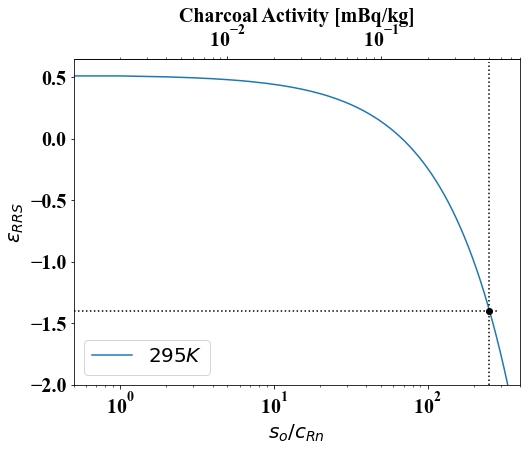

In [30]:
figure_layout(1)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(SoCxeSpace, 1-Gout_st_1,       label='$295 K$')

ax.axhline(y=-1.4, color='k', xmax=0.95, linestyle=':')
ax.axvline(x=250, color='k', ymax=0.99,  linestyle=':')
ax.plot(250, -1.4, 'ko')

ax.set_xscale('log')


ax.set_xlabel('$s_o/c_{Rn}$')
ax.set_ylabel('$\epsilon_{RRS}$')
#plt.grid(True)
plt.xlim(0.5, 400)
plt.ylim(-2, 0.65)
ax.legend(loc='lower left', frameon=True, labelspacing=0.2)

# the top x axis is plotted assuming 0.2 microBq/kg rn activity in charcoal
Cxe = 2 # microBq/kg

def So2Sr(SoCxeSpace):
    return (Cxe/1000*(SoCxeSpace + 0.000000001))

def Sr2So(SoCxeSpace):
    return (SoCxeSpace)

secax = ax.secondary_xaxis('top', functions=(So2Sr, Sr2So))
secax.set_xlabel('Charcoal Activity [mBq/kg]')
secax.set_xticks([0.01, 0.2, 0.5])
secax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
secax.set_xticklabels(['0.01', '0.2', '0.5'])
plt.show()

In [29]:
figure_layout(1)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(SoCxeSpace, 1-Gout_st_1,       label='$295 K$')
ax.plot(SoCxeSpace, 1-Gout_st_2, '--' ,label='$190 K$')

ax.axhline(y=0.2, color='k', xmax=0.95, linestyle=':')
ax.axhline(y=0.42, color='k', xmax=0.77, linestyle=':')
ax.axvline(x=250, color='k', ymax=0.99,  linestyle=':')
ax.axvline(x=75, color='k', ymax=0.99,  linestyle=':')
ax.plot(75, 0.42,  'ko')
ax.plot(250, 0.2, 'ko')

ax.set_xscale('log')

ax.set_xlabel('$s_o/c_{Rn}$')
ax.set_ylabel('$\epsilon_{RRS}$')
plt.xlim(0.5, 400)
plt.ylim(-.3, 0.65)
ax.legend(loc='lower left', frameon=True, labelspacing=0.2)

# the top x axis is plotted assuming 0.2 microBq/kg rn activity in charcoal
Cxe = 2 # microBq/kg

def So2Sr(SoCxeSpace):
    return (Cxe/1000*(SoCxeSpace + 0.000000001))

def Sr2So(SoCxeSpace):
    return (SoCxeSpace)

secax = ax.secondary_xaxis('top', functions=(So2Sr, Sr2So))
secax.set_xlabel('Charcoal Activity [mBq/kg]')
secax.set_xticks([0.01, 0.2, 0.5])
secax.set_xticklabels(['0.01', '0.2', '0.5'])
plt.show()

In [6]:
# Performance of the VSA including the specific activity of charcoal

############### Defining computational parameters and constants ######################
Trn       = 132*60 # Rn lifetime in unit of minute (note this is lifetime not half life)
T_feed    = 60     # min
rho_xe    = 5.86   # stp density of xenon g/l
C_Xe      = 2      # activity of radon in Xe microBq/kg
S_o       = 500    # radon activity of charcoal in microBq/kg

Ka_ct     = 3   # l/g at 190K
Ka_wt     = 0.5 # l/g at 295K

r_leave = 0.9 # fraction of cleaned carrier gas leaving the swing system
r_purge = 0.1 # fraction of cleaned carrier gas for purging 

feedFlowFraction  = 1/r_leave       # fraction of flow in the feed column of the vsa to detector flow rate
purgeFlowFraction = r_purge/r_leave # fraction of flow in the purge column of the vsa to detector flow rate 

SoSxe = S_o/C_Xe

nLoops = 400 # number of swings

Evsa_90 = 0.90 # radon removal remanent fraction of the swing system 
Ect = 0.1 # radon removal efficacy of the single trap, percentage of radon trapped by single trap
########################################################################################

Gi_90 = 1 # initial Rn fraction (1 b/c no reductin at first)

# pre-allocation sim needed variables
Gout_90 = np.zeros(nLoops) # array of radon fraction escaped in each feed

Gloop_90 = np.zeros(nLoops+1) # array of radon fraction in the loop each feed. initialization of loop below


#fraction of radon atoms from the feed column in one feed time 
TRF_feed_cold  = TrapRnPerFeedFrac(rho_xe, SoSxe, T_feed, Trn, Ka_ct, feedFlowFraction)

#fraction of radon atoms from the purge column in one feed time
TRF_purge_cold = TrapRnPerFeedFrac(rho_xe, SoSxe, T_feed, Trn, Ka_ct, feedFlowFraction)*10

#defining the first loop element when purge column is not saturated. 
#It has no contribution from the input of detector
Gloop_90[0] = (r_purge*((1-Evsa_90)*Gi_90 + TRF_feed_cold) + r_purge*TRF_purge_cold)

#looping over the feeds
for i in range(0,nLoops):
    # radon fraction escaped the swing system
    Gout_90[i] = r_leave*((1-Evsa_90)*(Gi_90)+ TRF_feed_cold)
        
    #radon fraction in the loop as we loop over the feed cycle times
    Gloop_90[i+1] = (r_purge*(1-Evsa_90)*Gi_90 + r_purge*TRF_feed_cold + (Evsa_90*Gi_90)*np.exp(-T_feed/Trn) + TRF_purge_cold) 
 
    # Gi changes as we loop over the feed cycle time until we reach steady state
    Gi_90 = 1 + (1-Ect)*Gloop_90[i+1]

    

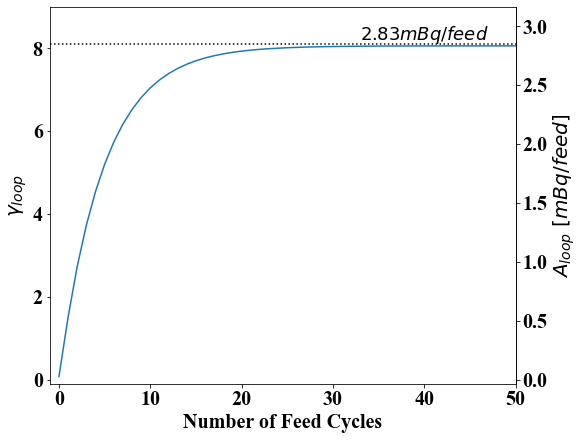

loop activity per feed in mBq: 2.8331 


In [9]:
# do plot - radon escaping the swing system asymptotically reaching a constant value.
# this value indicates the performance of the swing system
figure_layout(1)

fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
plt.plot(Gloop_90,  label='1')


ax.set_xlabel('Number of Feed Cycles')
ax.set_xlim(-1,50)
ax.set_ylim(-0.1,9)
ax.set_ylabel('$\gamma_{loop}$')

plt.axhline(y=8.1, color='k', linestyle=':')
plt.text(33, 8.2, '$2.83 mBq/feed$', dict(size=15), color='k', size=18)

def AloopAin(Gloop_90):
    return (Gloop_90*0.3516)

def AinAloop(Gloop_90):
    return (Gloop_90)

secax = ax.secondary_yaxis('right', functions=(AloopAin, AinAloop))
secax.set_ylabel('$A_{loop}~[mBq/feed]$')
plt.show()

print("loop activity per feed in mBq: %.4f " %(Gloop_90[-1]*0.3516)) 

### Efficacy of a single-trap in the feedback loop of a VSA in LZ

From the derivation in Appendix B:
$\epsilon=1-A_{out}/A_{in} = \bigg[1-\frac{s_oft_{feed}}{k_aA_{in}}\bigg]\left(1-e^{-\frac{mk_a}{f\tau }}\right),$

In [18]:
#this funtion calculates the efficiency of a single-column adsorptive trap
def E_CT_Swing(flow, mass, ka, Tau, Srn, Aswing, Ts):
    return 1- np.exp(-ka*mass/(flow*Tau)) - (Ts*Srn*flow/ka)*(1 - np.exp(-ka*mass/(flow*Tau)))/Aswing

# steady state activity in the VSA feedback loop per feed from the above figure
A_loop = Gloop_90[-1]*0.3516 


#constants
Ka_ct     = 3000         # l/kg at 190K
TauRN     =  5.516*24*60 # radon lifetime in min

massSpace = np.linspace(1,50000,50000)


#efficiencies for various charcoal activities
ectSpaceM050_loop  =  E_CT_Swing(50,massSpace,Ka_ct,TauRN,0.5, A_loop, T_feed)
ectSpaceM001_loop  =  E_CT_Swing(50,massSpace,Ka_ct,TauRN,0.01,A_loop, T_feed)
ectSpaceM010_loop  =  E_CT_Swing(50,massSpace,Ka_ct,TauRN,0.1, A_loop, T_feed)

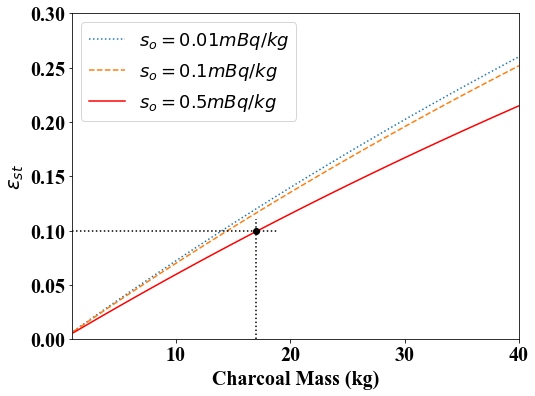

In [21]:
figure_layout(1)
plt.figure(figsize=(8,6))

plt.plot(massSpace, ectSpaceM001_loop,':',      label="$s_o = 0.01 mBq/kg$")
plt.plot(massSpace, ectSpaceM010_loop,'--',     label="$s_o = 0.1 mBq/kg$")
plt.plot(massSpace, ectSpaceM050_loop, c='red', label="$s_o = 0.5 mBq/kg$")

plt.axhline(y=0.10, xmax = 0.46, color='k', linestyle=':')
plt.axvline(x=17, ymax = 0.37, color='k', linestyle=':')
plt.plot(17, 0.10, 'o', color='k')

plt.legend(loc='upper left', prop={'size': 18})
plt.xlim(0.9, 40)
plt.ylim(0, 0.3)
plt.ylabel('$\epsilon_{st}$')
plt.xlabel('Charcoal Mass (kg)')
plt.show()



In [16]:
# Performace of the VSA as a function of the swing time this does not take into account specific activity of charcoal
# Parameters
#activity of inlet radon in one feed time
Trn       = 132*60 # Rn lifetime in unit of minute (note this is lifetime not half life)
T_feed    = 60     # min
rho_xe    = 5.86   # stp density of xenon g/l
S_Xe      = 2      # activity of radon in Xe microBq/kg
S_o       = 500    # radon activity of charcoal in microBq/kg

Ka_ct     = 3   # l/g at 190K
Ka_wt     = 0.5 # l/g at 295K
 
r_leave = 0.9 # fraction of cleaned carrier gas leaving the swing system
r_purge = 0.1 # fraction of cleaned carrier gas for purging 

feedFlowFraction  = 1/r_leave       # fraction of flow in the feed column of the vsa to detector flow rate
purgeFlowFraction = r_purge/r_leave # fraction of flow in the purge column of the vsa to detector flow rate 

SoSxe = S_o/S_Xe

nLoops = 1000 # number of swings

Evsa_90 = 0.9 # VSA feed column remanent fraction, percentage of inlet radon trapped by feed column
Ect     = 0.1 # radon removal efficacy of the feedback-loop single-trap

TfSpace = np.linspace(10,600,600) # range of feed times



# pre-allocation sim needed variables
Gout_w = np.zeros(nLoops) # array of radon fraction escaped in each feed
Gout_0 = np.zeros(nLoops) # array of radon fraction escaped in each feed
Gout_c = np.zeros(nLoops) # array of radon fraction escaped in each feed

Gloop_w = np.zeros(nLoops) # array of radon fraction in the loop during each feed
Gloop_0 = np.zeros(nLoops) # array of radon fraction in the loop during each feed
Gloop_c = np.zeros(nLoops) # array of radon fraction in the loop during each feed

# pre-allocating a variable to store Rn counts for each feed time
Gout_st_w = np.zeros(len(TfSpace))
Gout_st_0 = np.zeros(len(TfSpace))
Gout_st_c = np.zeros(len(TfSpace))

# looping over the feed cycle times
for idx, t in enumerate(TfSpace):
    
    Gi_0 = 1 # initial Rn fraction
    Gi_w = 1 # initial Rn fraction
    Gi_c = 1 # initial Rn fraction
    #looping over the feeds
    for i in range(0,nLoops):
        #fraction of radon atoms from the feed column in one feed time 
        TRF_feed_cold  = TrapRnPerFeedFrac(rho_xe, SoSxe, t, Trn, Ka_ct, feedFlowFraction)
        TRF_feed_warm  = TrapRnPerFeedFrac(rho_xe, SoSxe, t, Trn, Ka_wt, feedFlowFraction)

        
        #fraction of radon atoms from the purge column in one feed time x10 of feed
        TRF_purge_cold = TrapRnPerFeedFrac(rho_xe, SoSxe, t, Trn, Ka_ct, feedFlowFraction)*10
        TRF_purge_warm = TrapRnPerFeedFrac(rho_xe, SoSxe, t, Trn, Ka_wt, feedFlowFraction)*10
        
        # radon fraction that escaped the swing system
        Gout_0[i] = r_leave*(1-Evsa_90)*Gi_0
        Gout_w[i] = r_leave*((1-Evsa_90)*Gi_w + TRF_feed_warm)
        Gout_c[i] = r_leave*((1-Evsa_90)*Gi_c + TRF_feed_cold)

        # Gi changes as we loop over the feed cycle time until we reach steady state
        Gi_0 = (1-Ect)*(r_purge*(1-Evsa_90)*Gi_0
                        + (Evsa_90*Gi_0)*np.exp(-t/Trn))  +   1
        
        Gi_w = (   (1-Ect)*(r_purge*(1-Evsa_90)*Gi_w + r_purge*TRF_feed_warm
                            + (Evsa_90*Gi_w)*np.exp(-t/Trn) 
                            + TRF_purge_warm)
                   + 1  )
        
        Gi_c = (   (1-Ect)*(r_purge*(1-Evsa_90)*Gi_c + r_purge*TRF_feed_cold
                            + (Evsa_90*Gi_c)*np.exp(-t/Trn) 
                            + TRF_purge_cold)
                   + 1  )
        

        
    Gout_st_w[idx] = Gout_w[-1]
    Gout_st_0[idx] = Gout_0[-1]
    Gout_st_c[idx] = Gout_c[-1]



In [17]:
figure_layout(1)

fig, ax = plt.subplots(figsize=(9,6))
ax.semilogx(TfSpace, Gout_st_0,   ':',   color='tab:green',  label='$s_o = 0$' )
ax.semilogx(TfSpace, Gout_st_c,  '--',   color='tab:orange', label='$s_o = 0.5\,mBq/kg$ ' '  $(190\,K)$')
ax.semilogx(TfSpace, Gout_st_w,          color='tab:blue',   label='$s_o = 0.5\,mBq/kg$ ' '  $(295\,K)$')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xticks([30, 60, 100, 600])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_yticks([0.5, 1, 3])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xlabel('Feed Cycle Time [min]')
ax.set_ylabel('$(\gamma_{out})_{ss}$')


ax.legend(loc='best', frameon=True, labelspacing=0.2, prop={'size': 18})


mass of a trap for a given breakthrough time and flow rate can be calculated from $t_b = \frac{mk_a}{f}$

In [134]:
# returns the mass of the charcoal trap to achivie a given breakthrough time for at given flow rate

T_feed = 60 # min (chosen to be so based on this calculation, can be made longer)
F_LZ = 500  # LZ flow rate 500 SLPM

Ka_ct     = 3 #l/g at 190K
Ka_wt     = 0.5 #l/g at 295K

r_leave = 0.9 # fraction of cleaned carrier gas leaving the swing system
r_purge = 0.1 # fraction of cleaned carrier gas for purging 

feedFlowFraction  = 1/r_leave       # fraction of flow in the feed column of the vsa to detector flow rate
purgeFlowFraction = r_purge/r_leave # fraction of flow in the purge column of the vsa to detector flow rate 

# not the cryo variable is 1 or 0 
# indicating weather the trap is at room temp (Ka_w = 500l/kg at 295K) or at cyro temp (Ka_c = 3000 #l/kg at 190K)
def massCharForBreaktrhoughTime(breakthroughTime, trapFlowRate, cryo):
    if  cryo == 'cold': return breakthroughTime*trapFlowRate / Ka_ct
    if  cryo == 'warm': return breakthroughTime*trapFlowRate / Ka_wt
    else: print("cryo needs to be cold or warm as a string")
        
massChar70_C = massCharForBreaktrhoughTime(1.5*T_feed, feedFlowFraction*F_LZ, 'cold')/1000 # convert g to kilogram
massChar70_W = massCharForBreaktrhoughTime(1.5*T_feed, feedFlowFraction*F_LZ, 'warm')/1000 # convert g to kilogram 

print('%.2f kg charcoal is needed to achieve breakthrough(feed) time of %.2f(%.2f) min in cryo temperature trap' %(massChar70_C, 1.5*T_feed, T_feed))
print('%.2f kg charcoal is needed to achieve breakthrough(feed) time of %.2f(%.2f) min in room temperature trap' %(massChar70_W, 1.5*T_feed, T_feed))

16.67 kg charcoal is needed to achieve breakthrough(feed) time of 90.00(60.00) min in cryo temperature trap
100.00 kg charcoal is needed to achieve breakthrough(feed) time of 90.00(60.00) min in room temperature trap
